In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Context

In [2]:
# загрузим данные
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


# Data quality assessment

In [3]:
# посмотрим информацио о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Итак, что мы имеем.
1. Данные о том, выжил пассажир или нет.
2. Каким классом путешествовал пассажир
3. Имя и фамилию пассажира.
4. Пол пассажира.
5. Возраст пассажира. В данных около 3% пропусков.
6. Количество родственников на борту
7. Количество родителей/детей на борту
8. Номер билета. Почти 5% пропущенных значений.
9. За сколько был куплен билет
10. Номер каюты. Заполнено только на 1/3.
11. Порт, в котором сел пассажир на борт

In [4]:
# посмотрим статистические данные
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


По предварительным данным можно сделать вывод о том, что выжило только около 43% людей из представленных данных. Средний возраст пассажира составляет 38 лет. Минимальный возраст - 1 месяц. Максимальный возраст - 87 лет. Средняя стоимость билета почти 44 фунта. Минимальная - менее 1 фунта, максимальная - почти 745 фунтов.

# Data exploration

### Survived

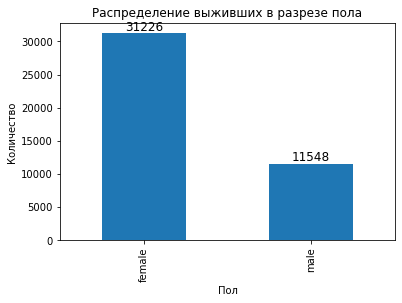

In [5]:
# # Посмотрим на данные по признаку выживания
# # можем посмотреть выживаемость в разрезе пола
# data[data.Survived==1].groupby(['Sex'])['Survived'].count().plot(kind='bar',
#                                                                  title='Распределение выживших в разрезе пола',
#                                                                  xlabel='Пол', ylabel='Количество')
# for i, val in enumerate(data[data.Survived==1].groupby(['Sex'])['Survived'].count().values):
#     plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

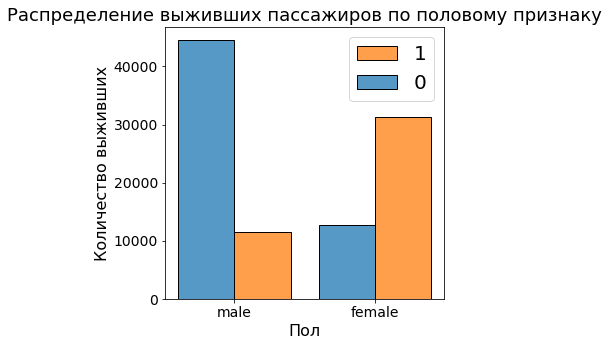

In [112]:
# Посмотрим на данные по признаку выживания
# можем посмотреть выживаемость в разрезе пола
fig = plt.figure(figsize=(5, 5))

plt.title('Распределение выживших пассажиров по половому признаку', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['Sex'], hue=data['Survived'], multiple="dodge", shrink=0.8, bins=4)
plt.legend(data['Survived'].unique(), fontsize=20)
plt.ylabel('Количество выживших', size=16)
plt.xlabel('Пол', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

Видно, что женщин выжило почти в 3 раза больше мужчин, так как спасали в первую очередь женщин и детей.

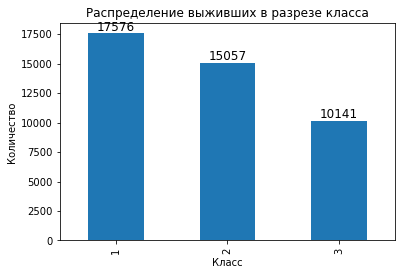

In [6]:
# # можем посмотреть выживаемость в разрезе класса
# data[data.Survived==1].groupby(['Pclass'])['Survived'].count().plot(kind='bar',
#                                                                     title='Распределение выживших в разрезе класса',
#                                                                     xlabel='Класс', ylabel='Количество')
# for i, val in enumerate(data[data.Survived==1].groupby(['Pclass'])['Survived'].count().values):
#     plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

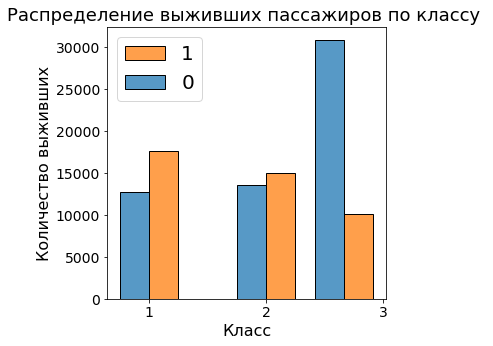

In [108]:
# можем посмотреть выживаемость в разрезе класса
fig = plt.figure(figsize=(5, 5))

plt.title('Распределение выживших пассажиров по классу ', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['Pclass'], hue=data['Survived'], multiple="dodge", shrink=1.5, bins=6)
plt.legend(data['Survived'].unique(), fontsize=20)
plt.ylabel('Количество выживших', size=16)
plt.xlabel('Класс', size=16)
plt.xticks(range(1, 4), ['1', '2', '3'])
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

Больше спаслось пассажиров первого и второго класса. Вероятно потому, что расстояние от кают 3 класса до палубы больше, а может и нет.

### Pclass

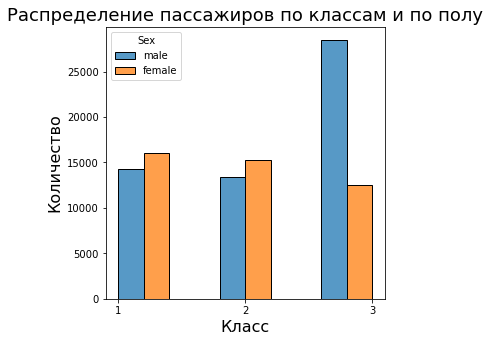

In [103]:
# посмотрим на распределение пассажиров по классу и полу
fig = plt.figure(figsize=(5, 5))
sns.histplot(data=data, x='Pclass', hue="Sex", multiple="dodge", shrink=1, bins=5)
plt.title('Распределение пассажиров по классам и по полу', fontdict={'fontsize':18})
plt.ylabel('Количество', size=16)
plt.xlabel('Класс', size=16)
plt.xticks(range(1, 4), ['1', '2', '3'])
plt.show()

Общее число пассажиров в первом и втором классе примерно одинаковое, женщин немного больше, чем мужчин. В третьем классе мужчин в два раза больше, чем женщин. И общее число пассажиров в третем классе больше, нежели в первых двух.

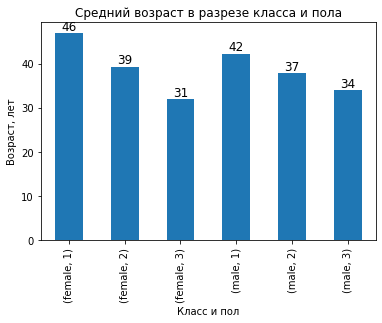

In [8]:
# посмотрим медианный возраст в разрезе классов и пола
data.groupby(['Sex', 'Pclass'])['Age'].mean().plot(kind='bar',
                                                   title='Средний возраст в разрезе класса и пола',
                                                   xlabel='Класс и пол', ylabel='Возраст, лет')
for i, val in enumerate(data.groupby(['Sex', 'Pclass'])['Age'].mean().values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

По графикам можно сделать вывод, что более высокий класс выбирают люди в возрасте. Уже более состоятельные, которые могут себе позволить больше потратить денег для повышения качества.

### Age

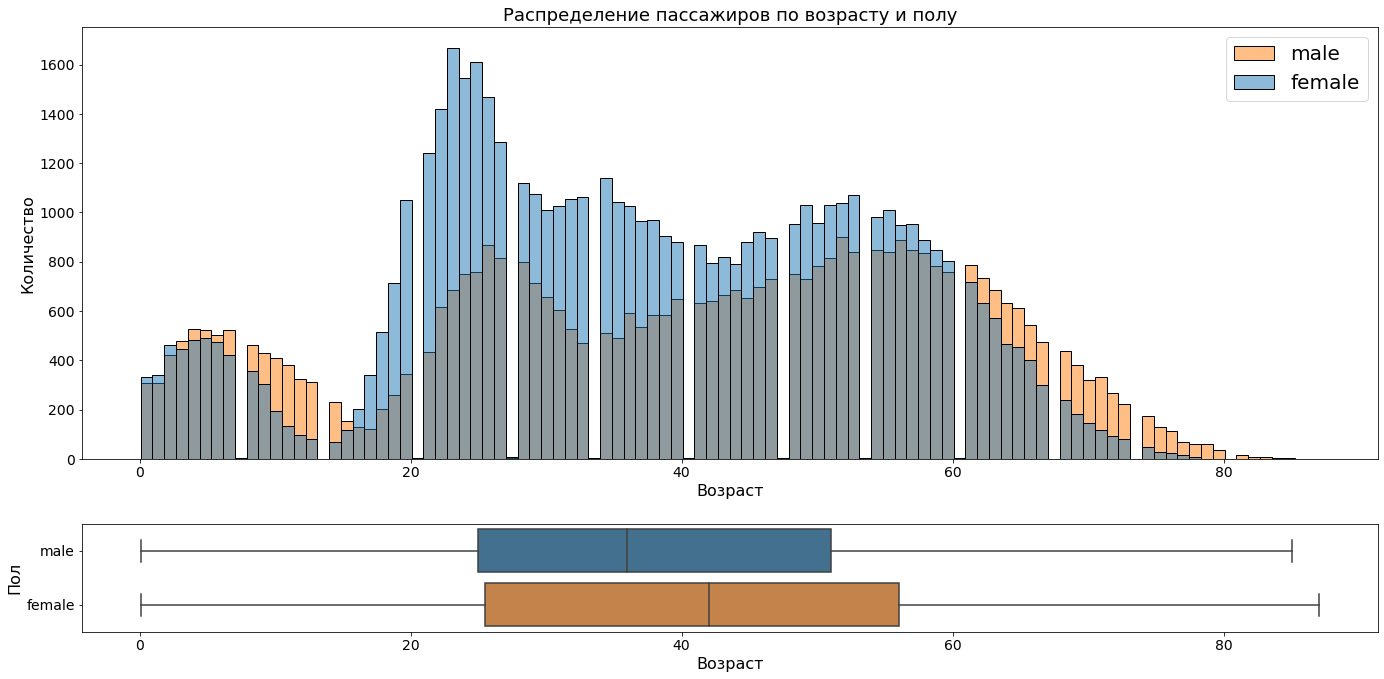

In [76]:
# посмотрим на возраст пассажиров в разрезе пола и количества пассажиров

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_axes([0, 0.4, 1, 1])
plt.title('Распределение пассажиров по возрасту и полу', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['Age'], hue=data['Sex'], bins=100)
plt.legend(data['Sex'].unique(), fontsize=20)
plt.ylabel('Количество', size=16)
plt.xlabel('Возраст', size=16)
plt.yticks(size=14)
plt.xticks(size=14)

ax2 = fig.add_axes([0, 0, 1, 0.25])
sns.boxplot(y='Sex', x='Age', data=data, orient='h', saturation=0.5)
plt.ylabel('Пол', size=16)
plt.xlabel('Возраст', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

На основе данных графиков можно сделать некоторые выводы:
 - мужчин на корабле было больше, чем женщин
 - больше всего мужчин в возрасте 20-25 лет
 - больше всего женщин в возрасте 25 лет и 50-53 года
 - количество женщин преобладают в категории возраса 60+, а также в диапазоне от 3-х до 16 лет
 - количество мужчин преобладает в возрасте от 16 до 60 лет, а также незначительно в возрасте до 3-х лет
 - основная масса мужчин находится в диапазоне 24-50 лет
 - основная масса женщин находится в диапазоне 25-55 лет

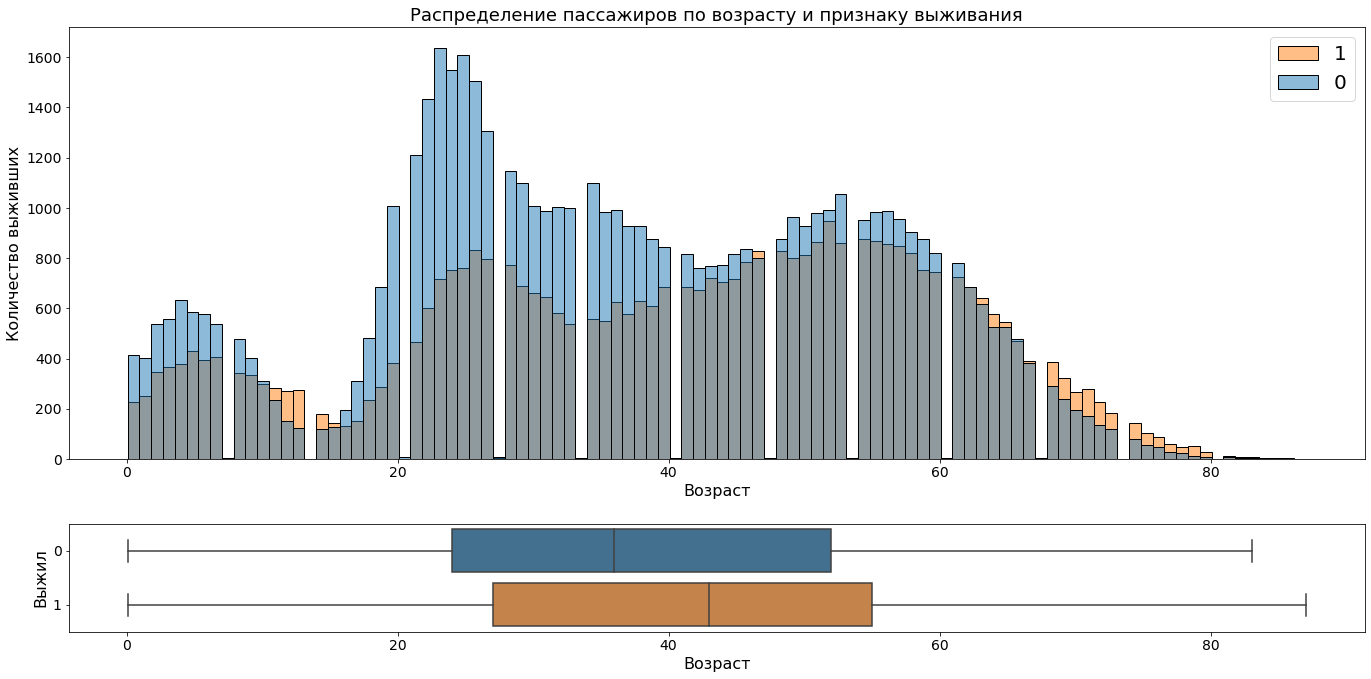

In [85]:
# посмотрим на возраст пассажиров в разрезе количества выживших

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_axes([0, 0.4, 1, 1])
plt.title('Распределение пассажиров по возрасту и признаку выживания', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['Age'], hue=data['Survived'], bins=100)
plt.legend(data['Survived'].unique(), fontsize=20)
plt.ylabel('Количество выживших', size=16)
plt.xlabel('Возраст', size=16)
plt.yticks(size=14)
plt.xticks(size=14)

ax2 = fig.add_axes([0, 0, 1, 0.25])
sns.boxplot(y='Survived', x='Age', data=data, orient='h', saturation=0.5)
plt.ylabel('Выжил', size=16)
plt.xlabel('Возраст', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

По данному графику видно, что соотношение выживших и утонувших пассажиров от 40 лет примерно одинаковое. Пассажиры в возрасте покупали билеты классом повыше. У классов повыше расстояние до шлюпочной палубы меньше, чем у пассажиров 3-го класса.

### SibSp

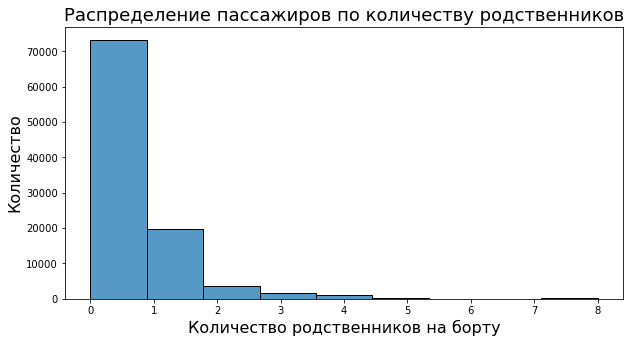

In [118]:
# посмотрим на распределение пассажиров по количеству родственников на борту
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='SibSp', bins=9)
plt.title('Распределение пассажиров по количеству родственников', fontdict={'fontsize':18})
plt.ylabel('Количество', size=16)
plt.xlabel('Количество родственников на борту', size=16)
plt.show()

У большинства пассажиров (более 70%) не было родственников на борту, около 20% - путешествовали вдвоем. Были на борту и большие семьи из 9 человек.

### Parch

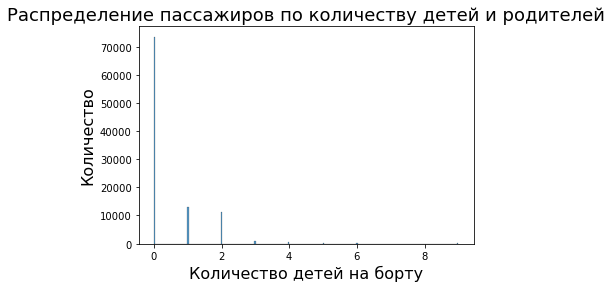

In [129]:
# посмотрим на распределение пассажиров по количеству детей и родителей на борту
fig = plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Parch')
plt.title('Распределение пассажиров по количеству детей и родителей', fontdict={'fontsize':18})
plt.ylabel('Количество', size=16)
plt.xlabel('Количество детей на борту', size=16)
plt.show()

Снова видим, что основная масса пассажиров (более 70%) путешествовали без детей. Около 10% пассажиров с 1 или 2 детьми. Также были семьи с 9 детьми.

### Fare

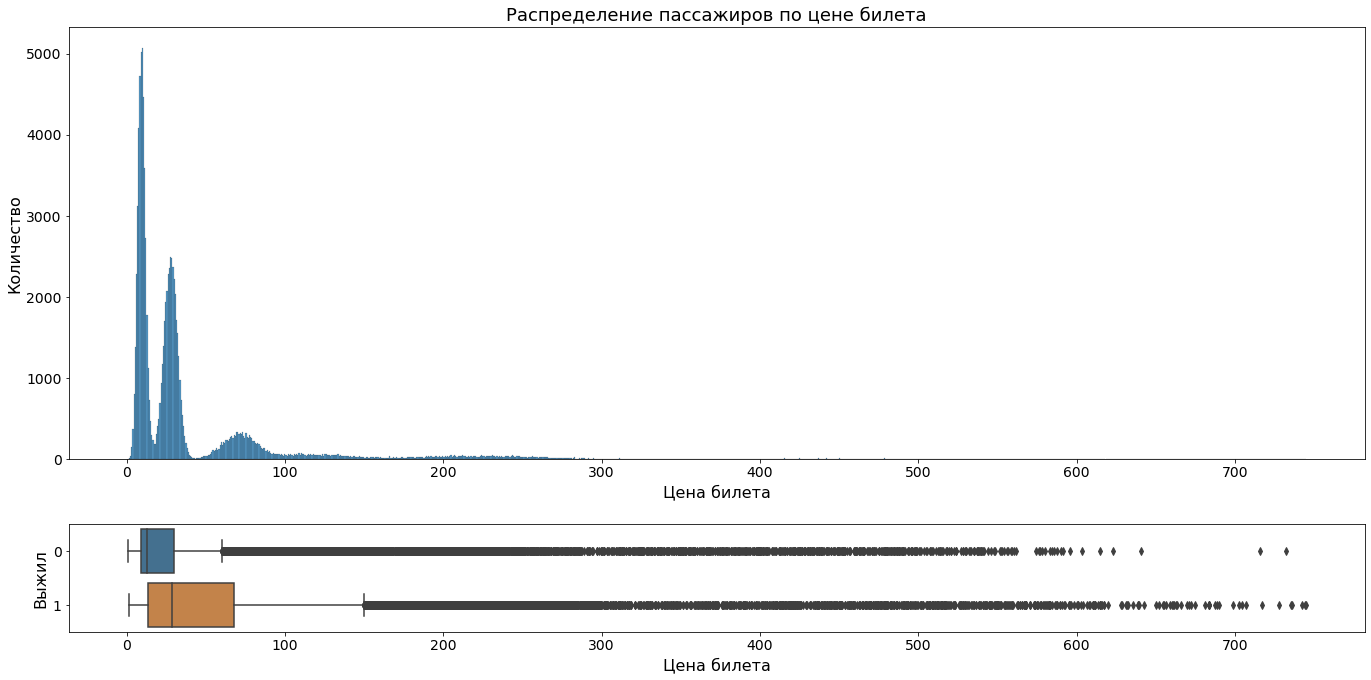

In [137]:
# посмотрим на распределение пассажиров по цене билета
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_axes([0, 0.4, 1, 1])
plt.title('Распределение пассажиров по цене билета', fontdict={'fontsize':18})
sns.histplot(data=data, x=data['Fare'], bins=1000)
plt.ylabel('Количество', size=16)
plt.xlabel('Цена билета', size=16)
plt.yticks(size=14)
plt.xticks(size=14)

ax2 = fig.add_axes([0, 0, 1, 0.25])
sns.boxplot(y='Survived', x='Fare', data=data, orient='h', saturation=0.5)
plt.ylabel('Выжил', size=16)
plt.xlabel('Цена билета', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

Как видно из графика цена билета никак не влияет на условие выживаемости.